<a href="https://colab.research.google.com/github/tc3oliver/LangChain-Guide/blob/dev/16_QA_Bot_With_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/LangChain')
with open('env_vars.txt', 'r') as file:
  for line in file:
    key, value = line.strip().split('=')
    os.environ[key] = value

Mounted at /content/drive


In [ ]:
!pip install langchain openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.1.1:
      Successfully uninstalled pydantic-2.1.1


In [ ]:
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.0/271.0 kB 3.9 MB/s eta 0:00:00


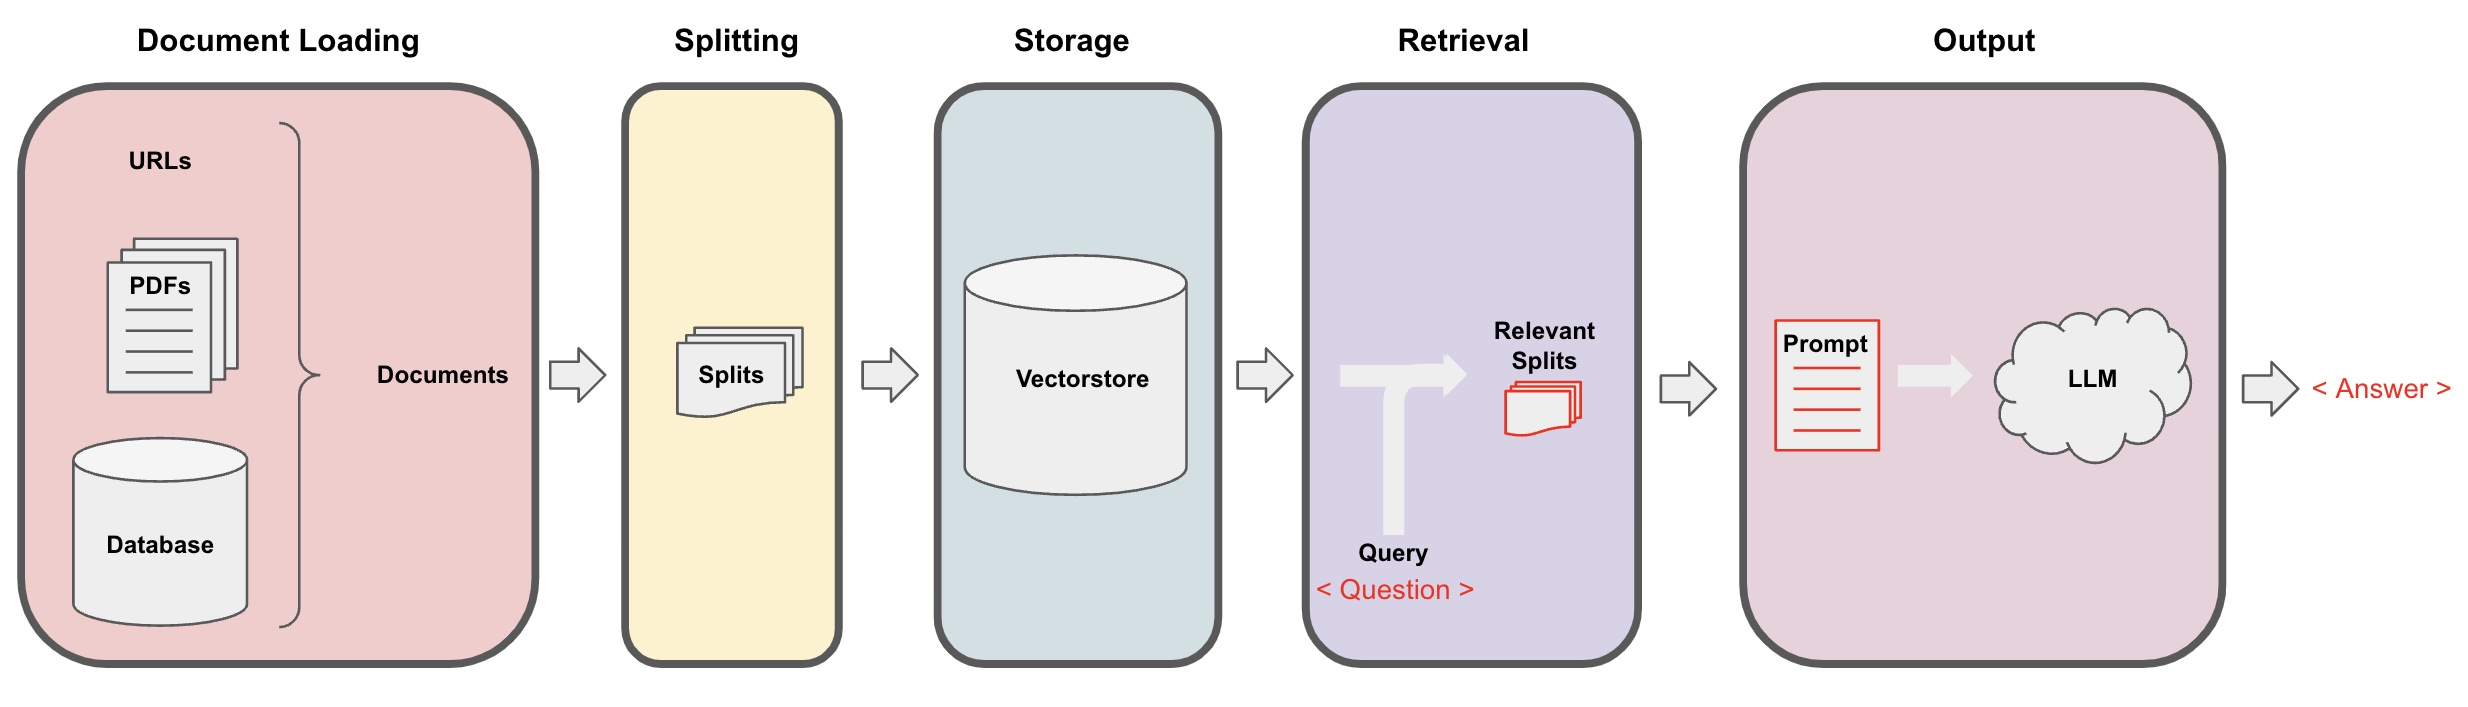

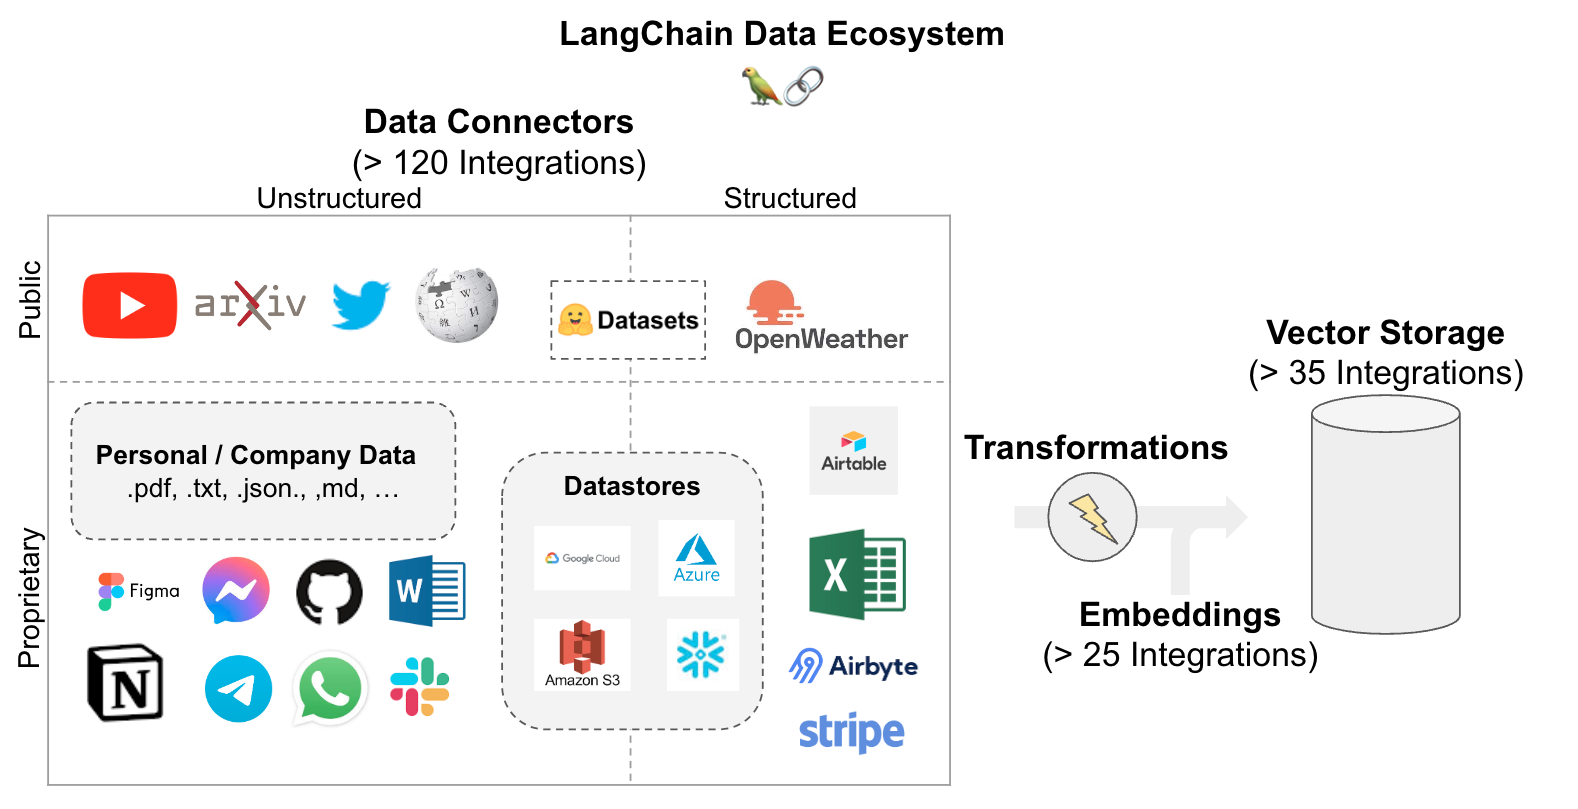

## doc loading

In [ ]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("ai.pdf")
pages = loader.load_and_split()

## split

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter(
 chunk_size = 500,
 chunk_overlap = 0
)

split_documents = text_splitter.split_documents(pages)

In [ ]:
split_documents[3]

Document(page_content='2 \n 推論並且予以解決，但是當時的電腦計算能力有限，一遇到複雜的問題就束手無\n策，被戲稱為只能解決玩具問題的人工智慧 。 \n第二個時期（ 1980~1990 年） ：主要是把大量專家的知識輸入電腦中，電\n腦依照問題判斷答案 ，連續的問題有一個判斷錯誤則得到錯誤的結果，而且知識\n是無窮無盡的，不可能把所有的知識都輸入電腦，還把所有知識的前後順序都找\n出來，因此最後變得不實用 。 \n第三個時期 （ 2000~現今） ：由於半導體技術的進步提升了很大的運算能力，\n而且半導體成本的下降使用雲端儲存變得便宜 ，使得大量數據的儲存與運算變得\n容易，提供了人工智慧極佳的發展環境，依照目前整個科技產業的發展，我們不\n必擔心這一次的人工智慧會有冷卻的一天，相反的，應該擔心人工智慧的過 度發\n展，會不會有一天對我們造成負面的影響。  \n \n（二）人工智慧的技術  \n \n1.機器學習  \n機器學習是可以尋找適合讓電腦做預測或數學模型分類的一種演算方法。這\n種演算方法主要透過蒐集大量原始數據與標準答案，以訓練資料調整且選擇相應\n的數學模型，同時並藉由驗證資料比對計算分類結果，來判定模型是否適合用來', metadata={'source': 'ai.pdf', 'page': 2})

## storage

In [ ]:
!pip install chromadb tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.4 MB/s eta 0:00:00


In [ ]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma

vectorstore = Chroma.from_documents(documents=split_documents, embedding=OpenAIEmbeddings())

In [ ]:
question = "Ai 可以用在哪些領域"
docs = vectorstore.similarity_search(question)
docs[0]

Document(page_content='領域的應用數量不斷增加，尤其是改善對終端消費者服務。  \n \n趨勢二： AI導入醫療保健行業維持高速成長  \n由於醫療保健行業大量使用大數據及人工智慧，進而精準改善疾病診斷、醫\n療人員與患者之間人力的不平衡、降低醫療成本、促進跨行業合作關係。此外\nAI還廣泛應用於臨床試驗、大型醫療計畫、醫療諮詢與宣傳推廣和銷售開發。\n人工智慧導入醫療保健行業從 2016年到 2022年維持很高成長，預計從 2016\n年的 6.671億美元達到 2022年的 79.888億美元年均複合增長率為 52.68％。\n尤其，台灣累積了 20年健保資料，還有正在創建的台灣人體基因資料庫，再加\n上硬體製造能力等，只要能有效串聯、處理與分析，輔以法規鬆綁、籌建平台與\n跨領域合作，台灣朝 AI醫療發展將很有機會。  \n \n趨勢三： AI取代螢幕成為新 UI / UX介面  圖(四)：自動駕駛車  \n資料來源： audi', metadata={'page': 5, 'source': 'ai.pdf'})

In [ ]:
import logging

from langchain.chat_models import ChatOpenAI
from langchain.retrievers.multi_query import MultiQueryRetriever

logging.basicConfig()
logging.getLogger('langchain.retrievers.multi_query').setLevel(logging.INFO)

retriever_from_llm = MultiQueryRetriever.from_llm(retriever=vectorstore.as_retriever(),
                                                  llm=ChatOpenAI(temperature=0))
unique_docs = retriever_from_llm.get_relevant_documents(query=question)
unique_docs

INFO:langchain.retrievers.multi_query:Generated queries: ['1. 哪些領域可以應用人工智慧？', '2. 人工智慧在哪些領域有應用價值？', '3. 有哪些領域可以運用到人工智慧技術？']


[Document(page_content='預測或分類。  \n \n2.深度學習  \n深度學習是機器學習的一種分支，也是目前機器學習發展方向的主流。其概\n念主要是複合多層複雜結構的人工神經網絡，並將其中函數作多重非線性轉換，\n使之增加高度抽象化資料、記憶資料影響能力。  \n \n3.自然語言處理  \n自然語言處理又可分為不同的階段，包含：語音或文字辨識、自動分詞與詞\n性標注、語句生成與文本朗讀等。主要著重如何以電腦處理並運用自然語言，並\n企圖讓機器「理解」人類的語言，是人工智慧領域裡的其中一項重要分支。  \n \n（三）人工智慧的應用  \n \n1.溫布頓球賽炒熱氣氛靠 3大AI應用   \n溫布頓網球賽無疑是全球關注最熱切的的網球公開賽，不只因為最高額獎金\n或是費德勒等網球天王加持，為了炒熱話題，主辦單位全英草地網球俱樂部還運\n用了多項 IBM Watson 認知技術來炒熱氣氛，和提高球迷參與度。  IBM一方\n面用華生探索服務分析過去 22年累積的 5,371萬筆球賽記錄，來找出最能炒熱\n球賽氣氛的關鍵資訊，其次也利用語意分析追蹤 1,700萬則來自社交媒體的討', metadata={'page': 2, 'source': 'ai.pdf'}),
 Document(page_content='5 \n (1)感知：在車輛部署攝像頭、激光雷達、毫米波雷達等傳感器，配合高性\n能的算法，讓車輛感知周邊環境。  \n(2)高精度地圖：高精度地圖是實現自動駕駛的必要性技術之一，沒有高精\n度地圖就沒有安全的自動駕駛基礎。  \n(3)駕駛決策：在駕駛決策的技術研發中，為人工智慧提供大量運用地方。\n目的是，讓自動駕駛車輛在面對複雜交通環境時，能夠像人一樣駕駛，擁有人類\n的一些決策屬性和技巧，同時也要保證安全。  \n \n \n \n \n \n \n \n \n（四）人工智慧未來 趨勢  \n \n人工智慧的出現，徹底改變了人類生活的模式，慢慢的由以往的勞力全部替\n換成機械，許多企業家看準這點，紛紛投資大量的錢，有人預估， 2020年人工\n智慧在市場營收市值可突破 1000多億美元，而在 2025年，將可以達到 5000\n多億美元，短短的幾年間就成長了約五倍多 ，下列為人工智慧的八大發展趨勢。 \n \n趨勢一： AI 於

In [ ]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)
qa_chain = RetrievalQA.from_chain_type(llm,retriever=vectorstore.as_retriever())
qa_chain({"query": question})

{'query': 'Ai 可以用在哪些領域',
 'result': 'AI可以應用在許多不同的領域，包括但不限於以下幾個方面：\n\n1. 醫療保健：AI可以用於改善疾病診斷、醫療人員與患者之間的溝通，降低醫療成本，並促進跨行業合作關係。\n\n2. 農業：AI可以用於農作物生長狀態的分析和監測，自動判斷農作物感染病蟲害病變的情況，提高產能和節省人力。\n\n3. 自動駕駛：AI可以應用於自動駕駛技術，使車輛能夠自主行駛和避免碰撞。\n\n4. 人力資源管理：AI可以用於人員招募和面試選擇，加快招募作業並提高效率。\n\n5. 製造業：AI可以應用於生產流程的監控和優化，提高生產效率和品質。\n\n6. 教育：AI可以用於個性化教學和學習輔助，提供定制化的教育內容和學習體驗。\n\n7. 客戶服務：AI可以用於提供智能客戶服務和自動化的問題解答，提高客戶滿意度和效率。\n\n這只是一些常見的應用領域，隨著技術的不斷發展，AI的應用領域將會不斷擴大。'}

In [ ]:
import langchain
langchain.debug=True

In [ ]:
qa_chain({"query": question})

[chain/start] [1:chain:RetrievalQA] Entering Chain run with input:
{
  "query": "Ai 可以用在哪些領域"
}
[chain/start] [1:chain:RetrievalQA > 3:chain:StuffDocumentsChain] Entering Chain run with input:
[inputs]
[chain/start] [1:chain:RetrievalQA > 3:chain:StuffDocumentsChain > 4:chain:LLMChain] Entering Chain run with input:
{
  "question": "Ai 可以用在哪些領域",
  "context": "領域的應用數量不斷增加，尤其是改善對終端消費者服務。  \n \n趨勢二： AI導入醫療保健行業維持高速成長  \n由於醫療保健行業大量使用大數據及人工智慧，進而精準改善疾病診斷、醫\n療人員與患者之間人力的不平衡、降低醫療成本、促進跨行業合作關係。此外\nAI還廣泛應用於臨床試驗、大型醫療計畫、醫療諮詢與宣傳推廣和銷售開發。\n人工智慧導入醫療保健行業從 2016年到 2022年維持很高成長，預計從 2016\n年的 6.671億美元達到 2022年的 79.888億美元年均複合增長率為 52.68％。\n尤其，台灣累積了 20年健保資料，還有正在創建的台灣人體基因資料庫，再加\n上硬體製造能力等，只要能有效串聯、處理與分析，輔以法規鬆綁、籌建平台與\n跨領域合作，台灣朝 AI醫療發展將很有機會。  \n \n趨勢三： AI取代螢幕成為新 UI / UX介面  圖(四)：自動駕駛車  \n資料來源： audi\n\n術分析生長狀態 ，自動判斷農作物感染病蟲害病變的情況 若遇到有生長不良或病\n蟲害時，會自動移除 ，生產全程全部都用 AI辨識技術來監控，取代過去用人眼\n辨識的作法。若未來更大規模使用這樣的技術時，則可在更小的面積種植出更多\n蔬菜，大幅提高產能及節省人力，同時可就近提供食物給附近的城市，減少碳足\n跡。不過話說回來，這項系統目前僅適用室內溫室，而且系統的建 置成本也不算\n低。  \n \n7.AI自動駕駛  \n談到 AI人工智慧中的

{'query': 'Ai 可以用在哪些領域',
 'result': 'AI可以應用在許多不同的領域，包括但不限於以下幾個方面：\n\n1. 醫療保健：AI可以用於改善疾病診斷、醫療人員與患者之間的溝通，降低醫療成本，並促進跨行業合作關係。\n\n2. 農業：AI可以用於農作物生長狀態的分析和監測，自動判斷農作物感染病蟲害病變的情況，提高產能和節省人力。\n\n3. 自動駕駛：AI可以應用於自動駕駛技術，使車輛能夠自主行駛和避免碰撞。\n\n4. 人力資源管理：AI可以用於人員招募和面試選擇，加快招募作業並提高效率。\n\n5. 製造業：AI可以應用於生產流程的監控和優化，提高生產效率和品質。\n\n6. 教育：AI可以用於個性化教學和學習輔助，提供定制化的教育內容和學習體驗。\n\n7. 客戶服務：AI可以用於提供智能客戶服務和虛擬助手，提高客戶滿意度和忠誠度。\n\n這只是一些常見的應用領域，隨著技術的不斷發展，AI的應用領域將會不斷擴大。'}